# LL_RT

(0.0, 100.0)

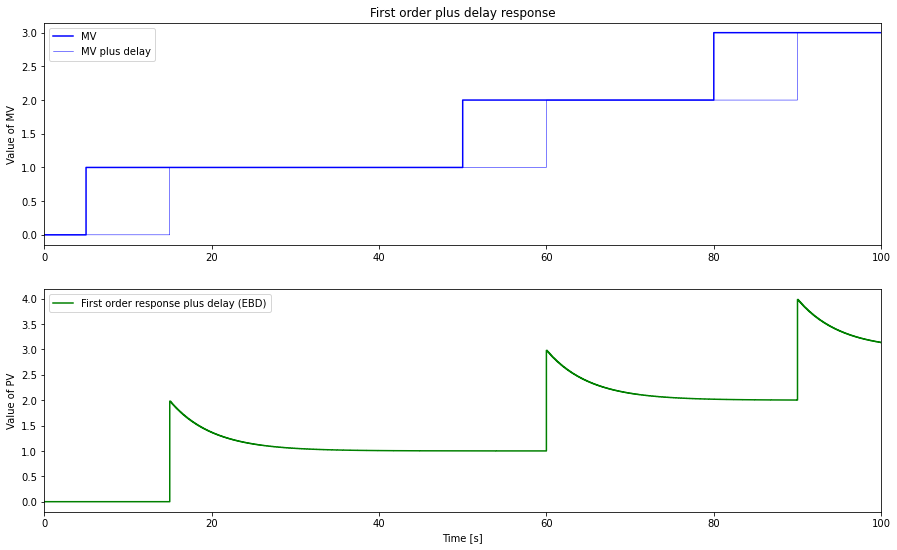

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_JM_RS import LL_RT


TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 10
Tlag = 5
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   

# Margin calculation

Gain margin :  -37.36997  at  0.89721  rad/s
Phase margin :  83.77624  at  0.00892  rad/s


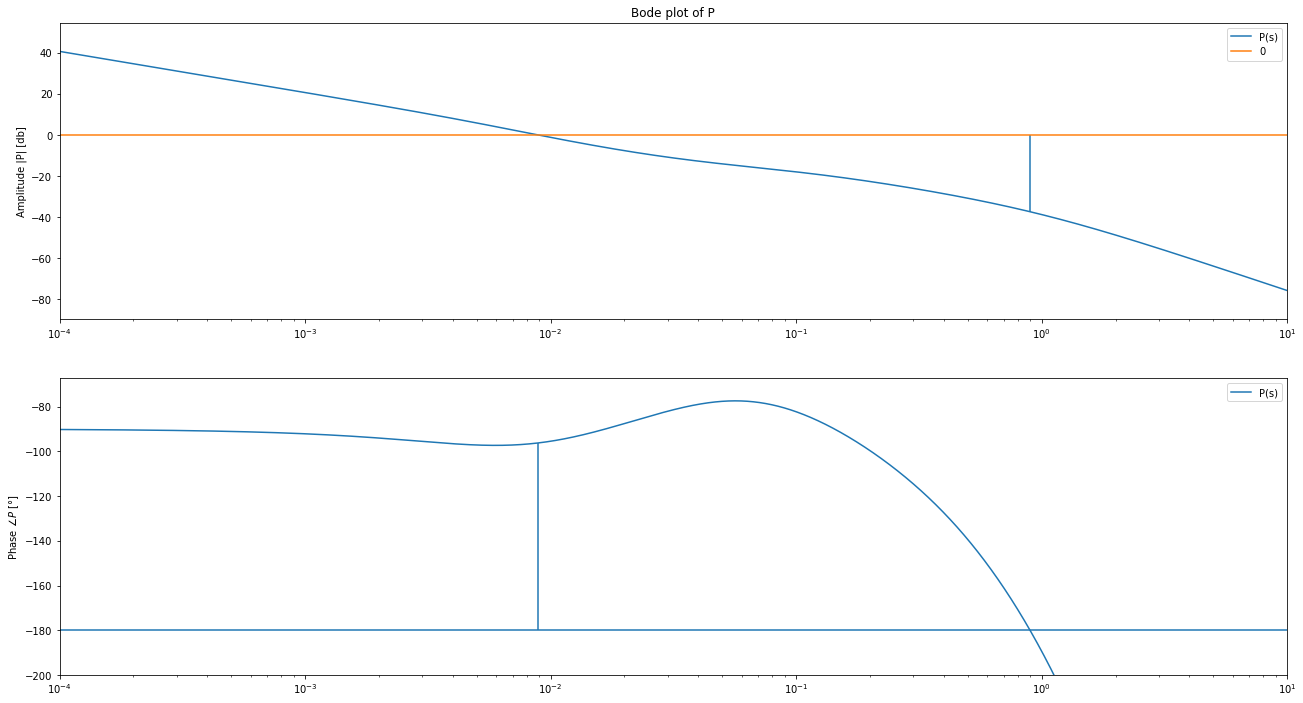

In [2]:
from package_JM_RS import PID,Margins
from package_DBR import Process
import numpy as np

P = Process({}) # Defaultprocess = unit gain

P.parameters['Kp'] = 0.63
P.parameters['Tlag1'] = 146.0
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = 1.0


C = PID({})
C.parameters['Kc'] = 1.9
C.parameters['Ti'] = 110.0
C.parameters['Td'] = 10.0
C.parameters['alpha'] = 1.0

omega = np.logspace(-4,1,10000)

Margins(P,C,omega)

# PID_RT

(0.0, 50.0)

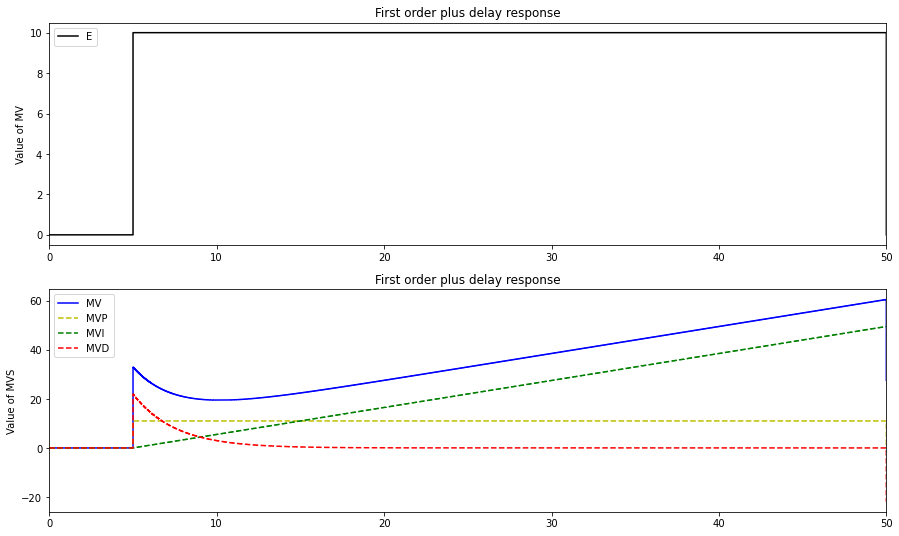

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_JM_RS import LL_RT, PID_RT, IMC_Tuning


TSim = 50
Ts = 0.01
N = int(TSim/Ts) + 1

# Path for MV
SPPath = {0: 50, 5: 60, TSim: 5}
PVPath = {0: 50, 5: 50, TSim: 5}
SP = []
PV = []

t = []
MV = []
MVP = []
MVI = []
MVD = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []
E = []

# Parameters
Kp = 1
Tlead = 10
Tlag = 5
theta = 10

Kc = 1.1
Ti = 10
Td = 5
alpha = 0.5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    # PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,alpha, Ts,MVMin,MVMax,MV,MV_P,MV_I,MV_D, E ,MV_FF = False, PVInit = 0, Method = 'EBD-EBD')
    PID_RT(SP,PV,[False],[0],[0],Kc,Ti,Td,alpha, Ts,0,100,MV,MVP,MVI,MVD,E,False,10,5,Method = 'EBD-EBD')


plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,E,'k-',label='E',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MV,'b-',label='MV',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVP,'y--',label='MVP',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVI,'g--',label='MVI',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MVI')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVD,'r--',label='MVD',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MVS')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

 

# Closed-loop parameters for PID with FF

In [4]:
# Paramètres de simulation

Tsim = 2200
Ts = 1
N = int(Tsim/Ts) + 1

MV0 = 50
DV0 = 50
PV0 = 50

Kp = 0.5194904467673822
T1p = 129.9860279570493
T2p = 2.2419668343920548e-08 # Bizarre => à verifier
thetap = 7.219217782540495

Kd = 0.5066617883318505
T1d = 198.90601996256459
T2d = 8.124468051389487
thetad = 1.0918143519352412

gamma = 0.5
alpha = 1
Kc,Ti,Td = IMC_Tuning(Kp,T1p,T2p,thetap)



#1 OLP + no FF

# ManPath = {0 : True,Tsim : True}
# MVManPath = {0 : MV0, Tsim : MV0}
# SPPath = {0 : PV0, 800 : PV0}
# DVPath = {0 : 50, 1000 : 60, Tsim : 60}
# ActivateFF = False
# ManFF = True

#2 OLP + FF

# ManPath = {0 : True,Tsim : False}
# MVManPath = {0 : MV0, Tsim : MV0}
# SPPath = {0 : PV0, 800 : PV0}
# DVPath = {0 : 50, 1000 : 60, Tsim : 60}
# ActivateFF = True
# ManFF = True

#3 CLP + no FF

# ManPath = {0 : True, 750: False, Tsim : False}
# MVManPath = {0 : MV0, Tsim : MV0}
# SPPath = {0 : PV0, 800 : PV0-10, Tsim : PV0-10}
# DVPath = {0 : DV0, 1500 : DV0+10, Tsim : DV0+10}
# ActivateFF = False
# ManFF = False

#4 CLP + FF

ManPath = {0 : True, 750: False, Tsim : False}
MVManPath = {0 : MV0, Tsim : MV0}
SPPath = {0 : PV0, 800 : PV0-10, Tsim : PV0-10}
DVPath = {0 : DV0, 1500 : DV0+10, Tsim : DV0+10}
ActivateFF = True
ManFF = False

# Closed-loop simulation of a PID with FF

In [5]:
t = []
SP = [] 
MV = [] 
Man = []
MVMan = []
MVFF = []
MVP = []
MVI = []
MVD = []
DV = [] 
PV = [] 
E = []

MVFFDelay = []
MVFFLL1 = [] 


MVDelayp = [] 
PV1p = [] 
PV2p = []

MVDelayd = [] 
PV1d = []
PV2d = []
MVMin = 0
MVMax = 500

for i in range(0,N): 
    t.append(i*Ts)
    
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(DVPath,t,DV)
    
    Delay_RT(DV - DV0*np.ones_like(DV),np.max([thetad-thetap,0]),Ts,MVFFDelay)
    LL_RT(MVFFDelay,-Kd/Kp,T1p,T1d,Ts,MVFFLL1)

    if ActivateFF :
        LL_RT(MVFFLL1,1,T2p,T2d,Ts,MVFF)
    else : 
        LL_RT(MVFFLL1,0,T2p,T2d,Ts,MVFF)
    
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVMan)

    PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,alpha,Ts,MVMin,MVMax,MV,MVP,MVI,MVD,E,ManFF,PV0)

    Delay_RT(MV,thetap,Ts,MVDelayp,MV0)
    FO_RT(MVDelayp,Kp,T1p,Ts,PV1p,0)
    FO_RT(PV1p,1,T2p,Ts,PV2p,0)

    Delay_RT(DV - DV0*np.ones_like(DV),thetad,Ts,MVDelayd,0)
    FO_RT(MVDelayd,Kd,T1d,Ts,PV1d,0)
    FO_RT(PV1d,1,T2d,Ts,PV2d,0)

    PV.append(PV2p[-1] + PV2d[-1] + PV0-Kp*MV0)




# Plot data

(45.0, 65.0)

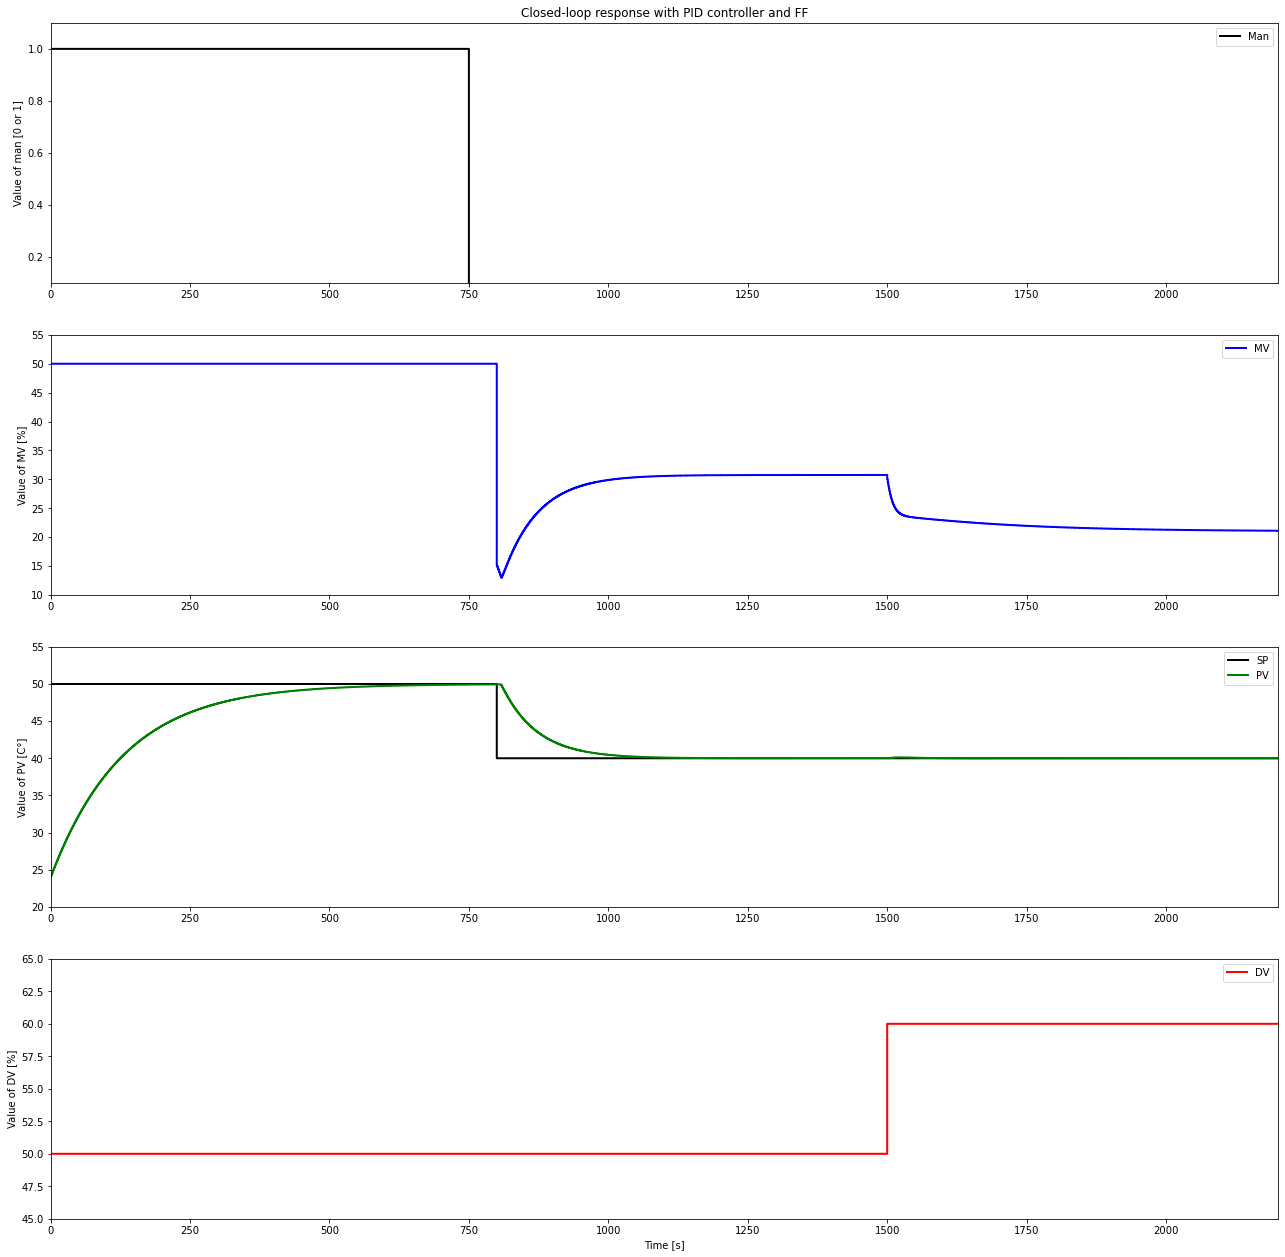

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.set_figheight(22)
fig.set_figwidth(22)

l1, = ax1.step([0,t[-1]],[0,100],'k-',linewidth=2,label='Man',where='post')
ax1.set_ylabel('Value of man [0 or 1]')
ax1.set_title('Closed-loop response with PID controller and FF')
ax1.legend(loc='best')

l2, = ax2.step([0,t[-1]],[0,100],'b-',linewidth=2,label='MV',where='post')
ax2.set_ylabel('Value of MV [%]')
ax2.legend(loc='best')


l3, = ax3.step([0,t[-1]],[0,100],'k-',linewidth=2,label='SP',where='post')
l4, = ax3.step([0,t[-1]],[0,100],'g-',linewidth=2,label='PV',where='post')
ax3.set_ylabel('Value of PV [C°]')
ax3.legend(loc='best')

l5, = ax4.step([0,t[-1]],[0,100],'r-',linewidth=2,label='DV',where='post')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Value of DV [%]')
ax4.legend(loc='best')

ManInt = [int(x) for x in Man]
l1.set_data(t,ManInt)
l2.set_data(t,MV)
l3.set_data(t,SP)
l4.set_data(t,PV)
l5.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)
ax4.set_xlim(0, t[-1]+1)

ax1.set_ylim(+0.1,1.1)
ax2.set_ylim(myRound(np.min(MV),5)-5,myRound(np.max(MV),5)+5)
ax3.set_ylim(myRound(np.min((np.min(PV),np.min(SP))),5)-5, myRound(np.max((np.max(PV),np.max(SP))),5)+5)
ax4.set_ylim(myRound(np.min(DV),5)-5,myRound(np.max(DV),5)+5)